## Loading data

In [1]:
import pandas as pd
from datetime import datetime, date

bikes = pd.read_csv("day.csv", parse_dates=['dteday'])
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Show correlation table

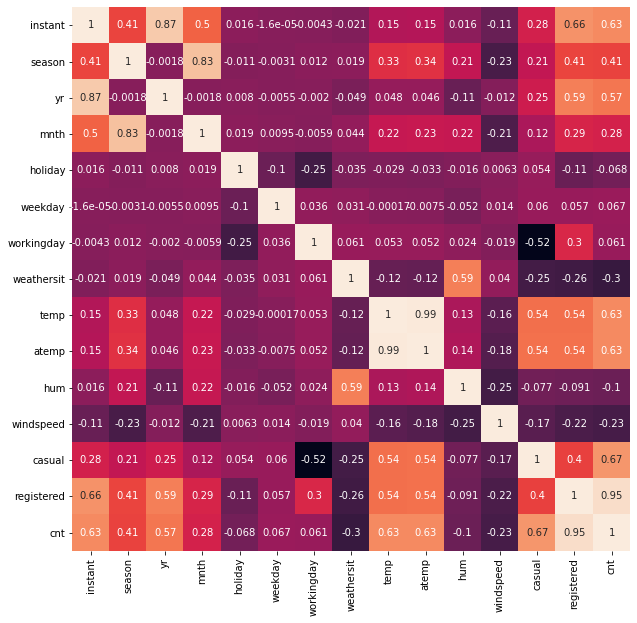

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bikes = bikes.loc[:, bikes.columns != 'dteday']
corr  = np.corrcoef(bikes.T)

plt.figure(figsize=(10, 10))
sns.heatmap(
    corr,
    cbar=False,
    annot=True,
    yticklabels=bikes.columns,
    xticklabels=bikes.columns)
plt.show()

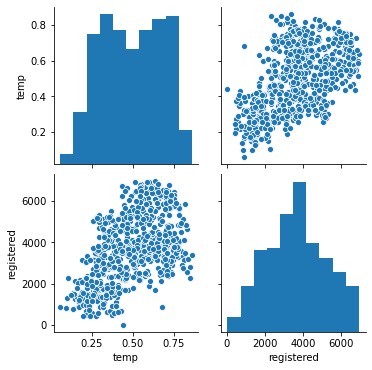

In [3]:
sns.pairplot(bikes[['temp', 'registered']])

## Linear

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

feats = ['temp']
label = 'registered'

X = bikes[feats]
y = bikes[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

linear_reg  = LinearRegression().fit(X_train, y_train)
score_train = linear_reg.score(X_train, y_train)
score_test  = linear_reg.score(X_test, y_test)

print("train: {}, test: {}".format(score_train, score_test))

train: 0.2894397189330029, test: 0.29427542275712537


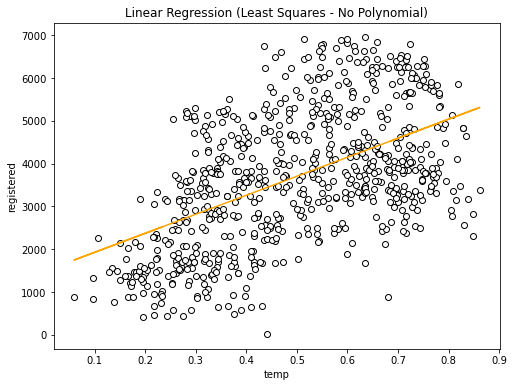

In [5]:
import matplotlib.pyplot as plt

y_predict = linear_reg.predict(X_test)

plt.figure(figsize=(8, 6))
plt.title("Linear Regression (Least Squares - No Polynomial)")
plt.xlabel('temp')
plt.ylabel('registered')
plt.scatter(X['temp'], y, edgecolor='black', color='w')
plt.plot(X_test, y_predict, color='orange')
plt.show()

## Linear (Polynomial)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

feats = ['temp']
label = 'registered'

X = bikes[feats]
y = bikes[label]

degrees = 3
X_poly  = PolynomialFeatures(degree=degrees).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

linear_reg  = LinearRegression().fit(X_train, y_train)
score_train = linear_reg.score(X_train, y_train)
score_test  = linear_reg.score(X_test, y_test)

print("train: {}, test: {}".format(score_train, score_test))

train: 0.3427117865309586, test: 0.371685603196769


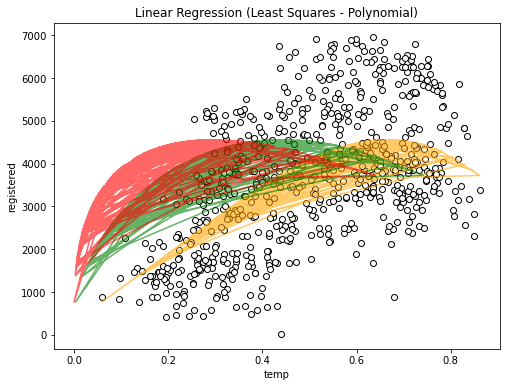

In [7]:
import matplotlib.pyplot as plt

y_predict = linear_reg.predict(X_test)

plt.figure(figsize=(8, 6))
plt.title("Linear Regression (Least Squares - Polynomial)")
plt.xlabel('temp')
plt.ylabel('registered')
plt.scatter(X['temp'], y, edgecolor='black', color='w')

colors = {1: 'orange', 2: 'green', 3: 'red'}

for i in range(1, degrees + 1):
    plt.plot(X_test[:,i], y_predict, color=colors[i], alpha=0.6)
    
plt.show()

## Ridge

In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

ridge = Ridge(alpha=20).fit(X_train, y_train)

score_train = ridge.score(X_train, y_train)
score_test = ridge.score(X_test, y_test)

print("train: {}, test: {}".format(score_train, score_test))

train: 0.21131995467057785, test: 0.19818161857049388


## Ridge scaled

In [9]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler         = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit with the X_train
X_test_scaled  = scaler.transform(X_test)      # apply THE SAME scaler

ridge = Ridge(alpha=20).fit(X_train_scaled, y_train)

score_train = ridge.score(X_train_scaled, y_train)
score_test  = ridge.score(X_test_scaled, y_test)

print("train: {}, test: {}".format(score_train, score_test))

train: 0.24767875041471266, test: 0.23615269197631883


## Lasso

In [10]:
from sklearn.linear_model import Ridge, Lasso

lasso = Lasso(alpha=20).fit(X_train, y_train)

score_train = lasso.score(X_train, y_train)
score_test = lasso.score(X_test, y_test)

print("train: {}, test: {}".format(score_train, score_test))

train: 0.2842911095363777, test: 0.2813866438355652


## Lasso scaled

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler         = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

lasso = Lasso(alpha=20).fit(X_train_scaled, y_train)

score_train = lasso.score(X_train_scaled, y_train)
score_test  = lasso.score(X_test_scaled, y_test)

print("train: {}, test: {}".format(score_train, score_test))

train: 0.2865231606947747, test: 0.285332265748411


## Lasso as feature selector

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

all_features = list(bikes.columns.values)

# removing all not feature suitable columns (dteday was already removed)
all_features.remove('registered')
all_features.remove('casual')
all_features.remove('cnt')

# then doing the regression with all the remaining features
X            = bikes[all_features]
y            = bikes['registered']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lasso       = Lasso(alpha=20).fit(X_train, y_train)

# showing features with their coefficients
feats_coeff = dict(zip(all_features, lasso.coef_))
feats_coeff

{'instant': 4.6922455121283315,
 'season': 403.43794430245987,
 'yr': 0.0,
 'mnth': -147.25674152072335,
 'holiday': -0.0,
 'weekday': 40.46762455840893,
 'workingday': 830.067983219723,
 'weathersit': -506.75253043165566,
 'temp': 2732.6155708939527,
 'atemp': 0.0,
 'hum': -0.0,
 'windspeed': -0.0}

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

# getting only the NON ZERO features
best_features = {k:v for (k, v) in sorted(feats_coeff.items(), key=lambda x: -x[1]) if v > 0}

# getting the higher ranked
best_feature = list(best_features.keys())[0]
best_feature

'temp'